In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [19]:
cryo_data = np.loadtxt("4K-Transmission-Data/4Kdata.csv", delimiter=",")

In [20]:
# equation for m values
m = 2.1731*10000*2*math.pi*1/1547.4
print(m)
m = 2.1731*10000*2*math.pi*1/1550
print(m)

88.23827058958224
88.09025800665779


In [21]:
x = cryo_data[:,0] 
del_lam = cryo_data[:,1]

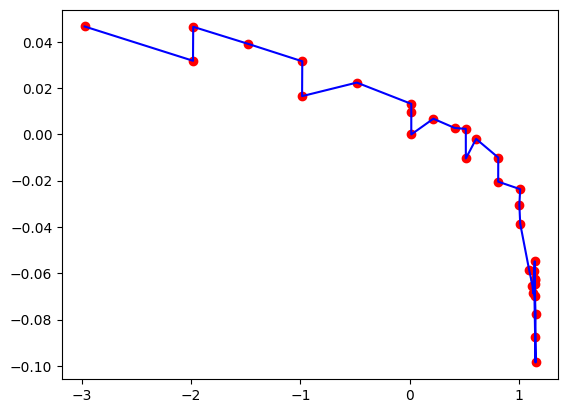

In [22]:


#y = func(x, -0.00005, 1.3, 0.05)
#rng = np.random.default_rng()
#y_noise = 0.2 * rng.normal(size=x.size)
#ydata = y + y_noise

plt.plot(x, del_lam, 'ro', label='data')
plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [23]:
R = 10000 #in nm
#n_eff = 3.453 - 1.13*del_lam - 0.04*del_lam**2
del_n_eff = del_lam*88/(2*np.pi*R)

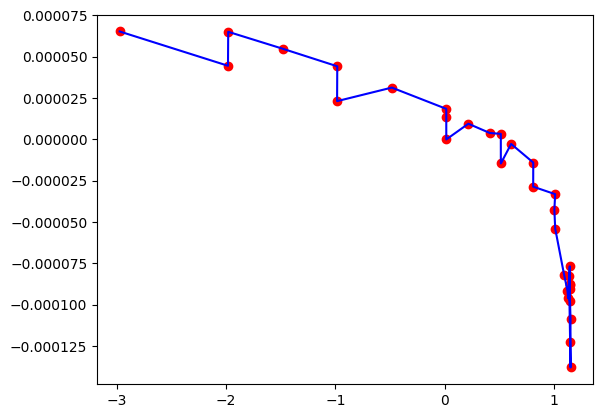

In [24]:
plt.plot(x, del_n_eff, 'ro', label='data')
plt.plot(x, del_n_eff, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

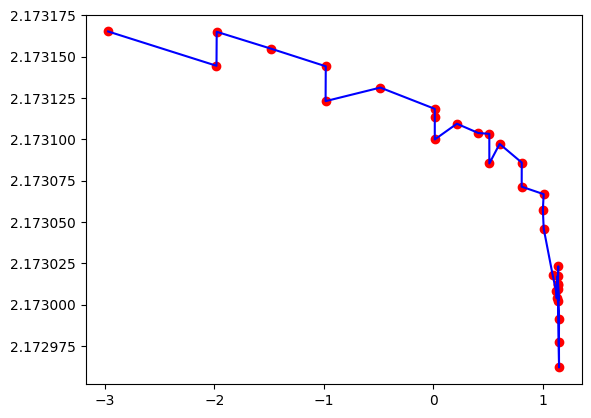

In [25]:
n_eff = 2.1731 + del_n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(x, n_eff, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [26]:
print(x) #print voltages

[-2.97131678 -1.98142654 -1.9794033  -1.48234782 -0.98301792 -0.98472487
 -0.48473255  0.01267327  0.01290573  0.01290793  0.21464068  0.4097616
  0.51112705  0.51139218  0.60533962  0.80756193  0.80683139  1.00786016
  1.00037241  1.00794567  1.08937998  1.12027671  1.12668729  1.14105415
  1.13871478  1.14792531  1.14722337  1.14826189  1.13451163  1.13888302
  1.14191029  1.13943828]


In [27]:
np.savetxt("voltages.csv", x, delimiter = ",")

In [28]:
print(x[16],n_eff[16])

0.8068313869935695 2.1730713730428053


In [29]:
#now we can plot the values from the fit we got

fit_neff = [2.17285711,2.1728357,2.17281401,2.17279922,2.17278479,2.17275934,2.17273212]
fit_neff = np.array(fit_neff)
voltages = [-2,-1,0,0.5,0.8,1,1.1]

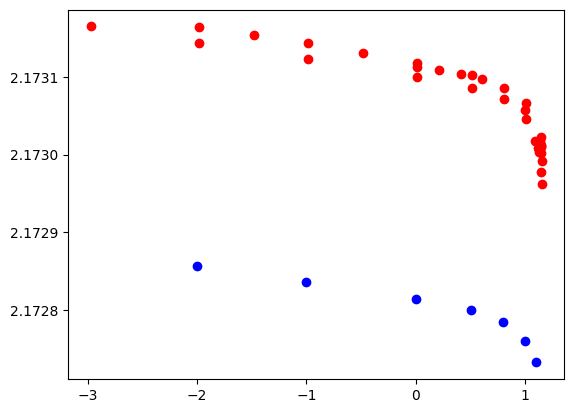

In [30]:
#the values plotted are a little off, but what is important is the del_lam,not the n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(voltages, fit_neff, 'bo', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

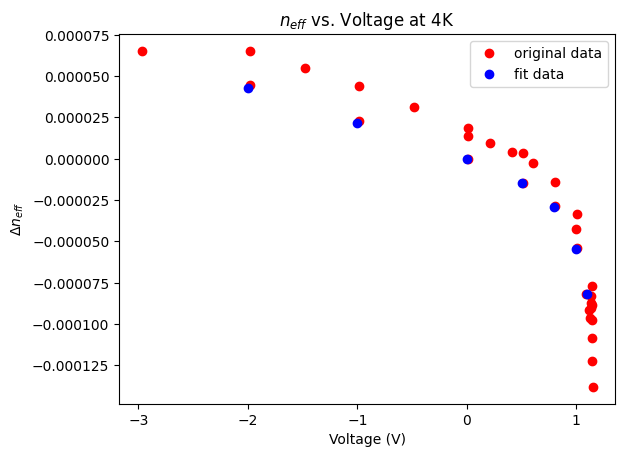

In [31]:
#n_eff = 2.17281401 + del_n_eff
del_fit_neff = fit_neff - 2.17281401

plt.plot(x, del_n_eff, 'ro', label='original data')
plt.plot(voltages, del_fit_neff, 'bo', label='fit data')
plt.title("$n_{eff}$ vs. Voltage at 4K")
plt.xlabel("Voltage (V)")
plt.ylabel("$\Delta n_{eff}$")
plt.legend()
plt.savefig("4KFitCheck.png")
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [32]:
print(voltages)

[-2, -1, 0, 0.5, 0.8, 1, 1.1]


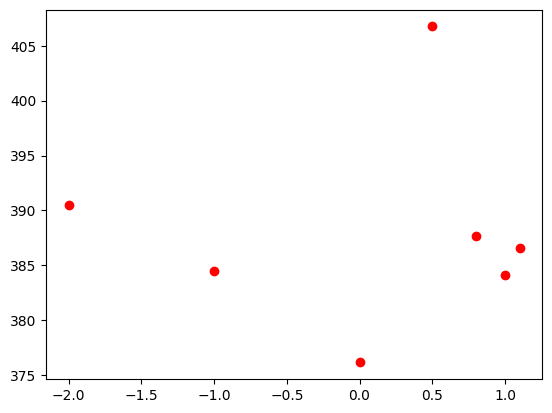

In [33]:
#absorption coefficient array
alpha = [390.53735989, 384.50306857, 376.15263474, 406.75013767, 387.66747036, 384.09874272, 386.56427546]

plt.plot(voltages, alpha, 'ro', label='data')
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [34]:
#saving this to a csv file
np.savetxt("FinalCSVs/4KAbsorb.csv", np.c_[voltages, alpha], delimiter = ",")